<a href="https://colab.research.google.com/github/RafaelYano/Aula_DataScience/blob/main/aula5dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
fonte =  "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
 
dados = pd.read_csv(fonte)
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [2]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO","NU_NOTA_TOTAL"]
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_NaN = dados_sem_notas_zero[provas].dropna()

In [4]:
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC","NU_NOTA_CN" ,"NU_NOTA_REDACAO"]
provas_saida = "NU_NOTA_MT"
notas_entrada = dados_sem_notas_NaN[provas_entrada]
notas_saida = dados_sem_notas_NaN[provas_saida]

In [5]:
x = notas_entrada
y = notas_saida

from sklearn.model_selection import train_test_split
SEED = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.25, random_state = SEED)

In [11]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematicas = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematicas)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


6604.41530621957

In [22]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematicas_arvore = modelo_arvore.predict(x_teste)

In [23]:
mean_squared_error(y_teste, predicoes_matematicas_arvore)

6107.603473586743

In [31]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y,cv=10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()


6558.227664658771

In [37]:
desvio_padrao = (resultados["test_score"]*-1).std()
limite_inferior = media - (2*desvio_padrao)
limite_superior = media + (2*desvio_padrao)

print(f"intervalo de confiança {limite_inferior} -  {limite_superior}")

intervalo de confiança 6015.7225495368075 -  7100.732779780734


**Desafio01: Pesquisar sobre intervalo de confiança**



In [38]:
def calcula_mse(resultados):
  media = (resultados["test_score"]*-1).mean()
  desvio_padrao = (resultados["test_score"]*-1).std()
  limite_inferior = media - (2*desvio_padrao)
  limite_superior = media + (2*desvio_padrao)
  print(f"intervalo de confiança {limite_inferior} -  {limite_superior}")

In [39]:
calcula_mse(resultados)

intervalo de confiança 6015.7225495368075 -  7100.732779780734


In [140]:
from sklearn.model_selection import KFold
import numpy as np

SEED = 1232
np.random.seed(SEED)

partes = KFold(n_splits = 15, shuffle=True)
resultados = cross_validate(modelo_arvore, x, y,cv=partes, scoring="neg_mean_squared_error", return_train_score=True)
calcula_mse(resultados)

intervalo de confiança 6291.933699770553 -  6830.601535052173


In [136]:
def regressor_arvore(nivel):
  SEED = 1232
  np.random.seed(SEED)
  partes = KFold(n_splits = 15, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth = nivel)
  modelo_arvore.fit(x_treino, y_treino)  
  resultados = cross_validate(modelo_arvore, x, y,cv=partes, scoring="neg_mean_squared_error", return_train_score=True)
  print(f"Treino{i} =  {(resultados['train_score']*-1).mean()} Teste{i} = {(resultados['test_score']*-1).mean()}")

In [137]:
regressor_arvore(4)

Treino20 =  5763.135640905358 Teste20 = 5815.105740581905


In [138]:
for i in range(1,21):
  regressor_arvore(i)

Treino1 =  7845.036978873035 Teste1 = 7859.535341784698
Treino2 =  6528.419755486103 Teste2 = 6554.428975188819
Treino3 =  6021.175895768137 Teste3 = 6060.294869440431
Treino4 =  5763.135640905358 Teste4 = 5815.105740581905
Treino5 =  5600.428123924155 Teste5 = 5679.504842300298
Treino6 =  5473.223848945904 Teste6 = 5590.873177623888
Treino7 =  5372.814747142461 Teste7 = 5546.361335017961
Treino8 =  5280.822902043266 Teste8 = 5537.0341249672365
Treino9 =  5174.297715594741 Teste9 = 5580.824493156257
Treino10 =  5035.002357894007 Teste10 = 5706.097917170774
Treino11 =  4850.427453960487 Teste11 = 5894.583030569226
Treino12 =  4618.569762053097 Teste12 = 6133.067157159239
Treino13 =  4346.514208088075 Teste13 = 6419.483286202284
Treino14 =  4035.988198426207 Teste14 = 6757.700251834016
Treino15 =  3699.1098443605224 Teste15 = 7107.919627899307
Treino16 =  3343.86861971903 Teste16 = 7512.196221482846
Treino17 =  2979.509138932593 Teste17 = 7907.6633106874115
Treino18 =  2619.3338360963066

**Desafio2: testar com outros parametros da arvore de decisão**

**Desafio3:Procurar outras formas de realizar os ajustes de parâmetros com o sklearn**

**Desafio4: Pesquisar o que é o problema de underfit**

---


Underfit é quando o sistema não é capaz nem de generalizar os dados e o modelo já se mostar ruim no treinamento

**Desafio5: Plotar um gráfico (linha em função do parâmetro sendo otimizado) com test_score e train_test**

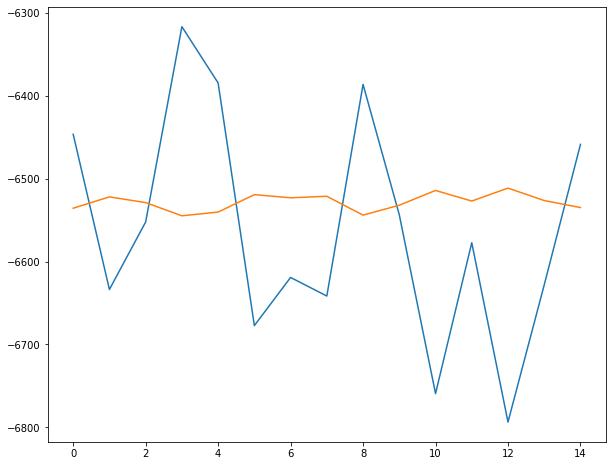

In [141]:
plt.figure(figsize=(10,8))
plt.plot(resultados["test_score"])
plt.plot(resultados["train_score"])



In [142]:
resultados

{'fit_time': array([0.06639433, 0.06297851, 0.06859732, 0.06566811, 0.06493163,
        0.06748748, 0.06553888, 0.06606293, 0.06813765, 0.07210279,
        0.06767559, 0.06180215, 0.06356621, 0.06355333, 0.06360531]),
 'score_time': array([0.00152755, 0.00146079, 0.00156021, 0.0015111 , 0.00202656,
        0.00178742, 0.00177765, 0.00193143, 0.00193548, 0.00178671,
        0.00177932, 0.00176048, 0.00175738, 0.00176978, 0.00176811]),
 'test_score': array([-6446.57663631, -6633.69202684, -6552.29021083, -6316.76571423,
        -6384.62924977, -6677.256271  , -6619.18796853, -6641.59444092,
        -6386.36589499, -6543.66264838, -6759.26249591, -6577.33872755,
        -6793.55315169, -6628.12662458, -6458.71219963]),
 'train_score': array([-6535.67491812, -6522.03202438, -6528.92086035, -6544.83873555,
        -6540.34665609, -6519.30976118, -6523.11745217, -6521.3056778 ,
        -6544.05925421, -6532.04254224, -6514.26338501, -6527.05213769,
        -6511.43994076, -6526.43847547, -65